<a href="https://colab.research.google.com/github/brownr16/electromagnetics_modelling/blob/main/MagneticCircuit_EnergyConversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b> Fundamental to Energy Conversion for a Magnetic Circuit</h1></b>

Dr. Bingsen Wang

4/30/2023
</center>

#Electric Energy Input



For a magnetic circuit with winding of $N$ turns, the induced voltage is $v=v(t)$ while the current through the winding is $i=i(t)$.
The electric power input is
$$ p(t) = v(t)i(t)\tag{1}$$

The induced voltage $v$ is related to the flux linkage $\lambda$ by
$$ v(t) = {d\lambda(t) \over dt} \tag{2}$$

Substituting (2) in (1) yields
$$ p(t) = i(t){d\lambda(t) \over dt}\tag{3}$$

The instantaneous energy input to the circuit is
$$w(t) = \int p(t)dt \tag{4}$$

Substituting (3) in (4) leads to
$$w(t) = \int i(\lambda) d\lambda \tag{5}$$

If the flux linkage changes from $\lambda_1$ to $\lambda_2$ within time $t_1$ to $t_2$, the total *electric* energy input is
$$W_{ele} = \int_{\lambda_1}^{\lambda_2} i(\lambda) d\lambda\tag{6}$$







#Energy Stored in the Magnetic Field

At $t_1$, the system is in configuration A with the magnetizing curve characterized by $i_1(\lambda)$. The energy stored in the magnetic field is
$$W_{fld1} = \int_0^{\lambda_1}i_1(\lambda)d\lambda \tag{7}$$

At $t_2$, the system changes to configuration B with the magnetizing curve characterized by $i_2(\lambda)$. The energy stored in the magnetic field is
$$W_{fld2} = \int_0^{\lambda_2}i_2(\lambda)d\lambda \tag{8}$$

Then the increase of the energy stored in the magnetic field is
$$\Delta W_{fld} = W_{fld2} - W_{fld1} \tag{9}$$



#Mechanical Energy Converted
If the energy losses that are converted to heat are neglected, the energy conservation results in the converted mechnanical energy $W_{mech}$ being 
$$W_{mech} = W_{ele} - \Delta W_{fld}\tag{10}$$

Substituting (9) in (10) yields
$$W_{mech} = W_{ele} + W_{fld1} - W_{fld2} \tag{11}$$
It is worth noting that both $W_{mech}$ and $W_{ele}$ can be postive and/or negative.

#Python Code
The Python code illustrates the energy conversion due to change of the configuration of the magnetic circuit.

<ipython-input-13-3c1008e0efd4>:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


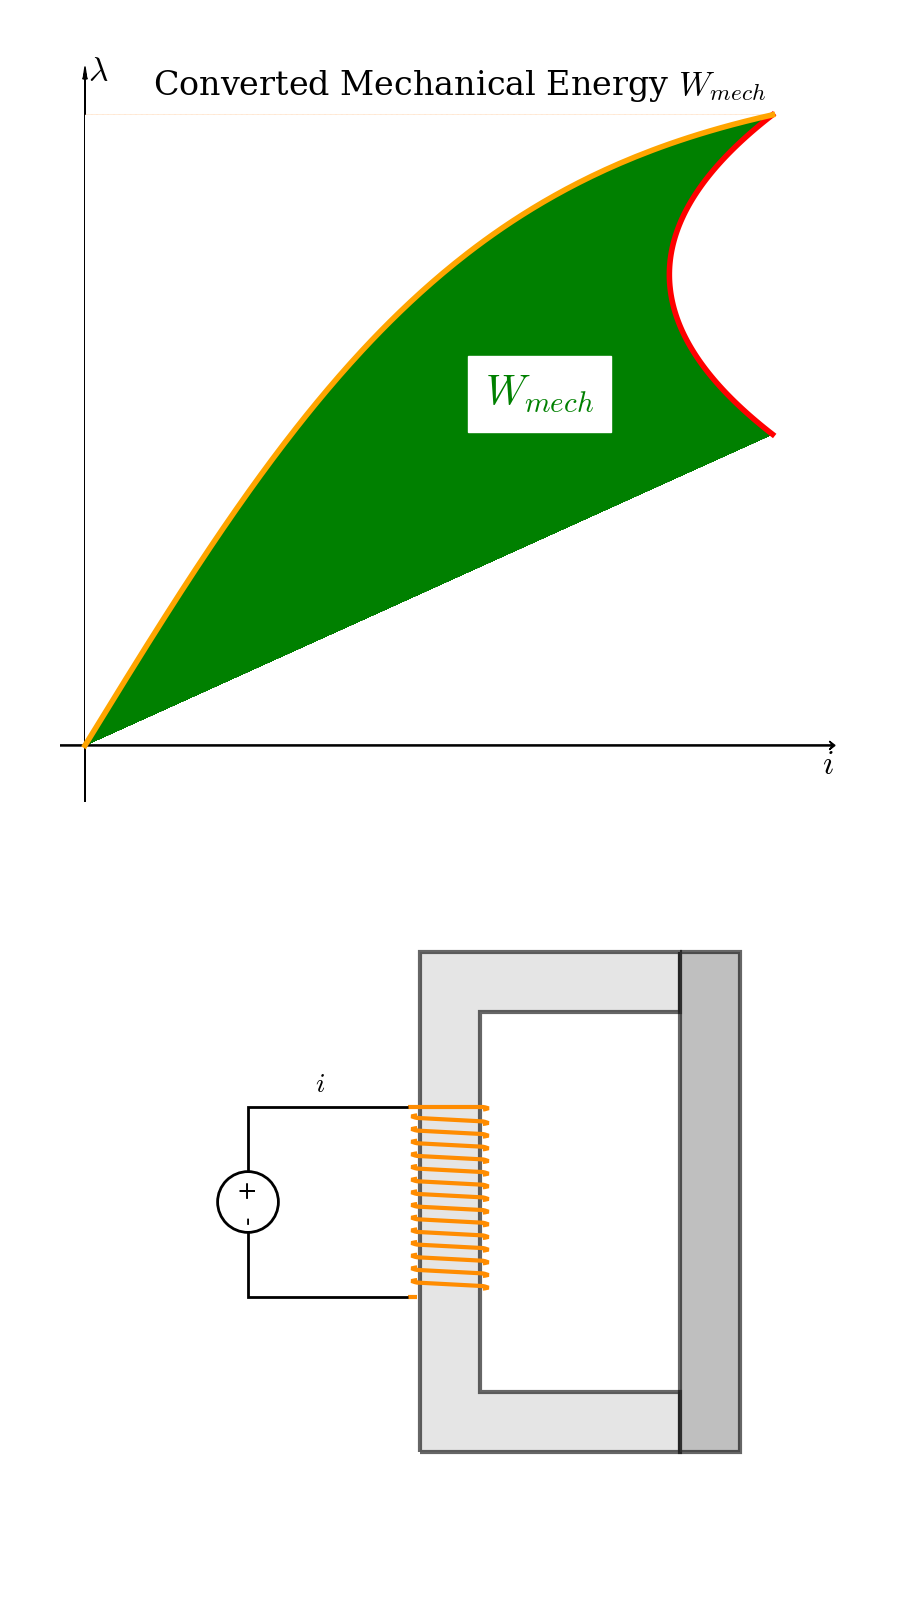

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,heaviside,angle,sqrt,tanh,arctanh,arctan
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba,to_rgb
from matplotlib.text import TextPath
from matplotlib.path import Path
import matplotlib.patches as mp
#  import PathPatch,Arrow,Circle,Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#draw coil
def drawCoil(ax,x0,y0,w,l,n,clr,lw,dir):
  """
  x0,y0: lower left corner of the coil
  w: width of the core that the coil is wound around
  l: length
  n: number of turns
  cl: color
  dir: 1 for right-hand up or left; 0 for opposite direction
  """
  dbt = l/n #distance between turns
  if dir==0:
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0),(x0+w*1.05,y0),(x0+w*1.2,y0+dbt*0.1),(x0+w*1.05,y0+dbt*0.2)],
                                    [Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE3]),
                               color=clr,fc='none',lw=lw)) #first turn
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0+l),(x0-w*.05,y0+l)],
                                    [Path.MOVETO,Path.LINETO]),
                               color=clr,fc='none',lw=lw)) #last turn
    
    for k in range(1,n): #turns other than 1st and last
        vt = [(x0-w*0.05,y0+dbt*(k-0.2)),
              (x0-w*.2,y0+dbt*(k-0.1)),
              (x0-w*0.05,y0+dbt*k),
              (x0+w*1.05,y0+dbt*k),
              (x0+w*1.2,y0+dbt*(k+0.1)),
              (x0+w*1.05,y0+dbt*(k+0.2))]
        codes = [Path.MOVETO,
                 Path.CURVE3,
                 Path.CURVE3,
                 Path.LINETO,
                 Path.CURVE3,
                 Path.CURVE3]
        rot = transforms.Affine2D().rotate_deg_around(x0+w*0.5,y0+dbt*k,arctan(dbt/w*0.25)*180/pi)+ax.transData
        ax.add_patch(mp.PathPatch(Path(vt,codes), color=clr,fc='none',lw=lw, transform=rot))
  if dir==1:
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0+l),(x0+w*1.05,y0+l),(x0+w*1.2,y0+l-dbt*0.1),(x0+w*1.05,y0+l-dbt*0.2)],
                                    [Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE3]),
                               color=clr,fc='none',lw=lw)) #first turn
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0),(x0-w*.05,y0)],
                                    [Path.MOVETO,Path.LINETO]),
                               color=clr,fc='none',lw=lw)) #last turn
    
    for k in range(1,n): #turns other than 1st and last
        vt = [(x0-w*0.05,y0+dbt*(k+0.2)),
              (x0-w*.2,y0+dbt*(k+0.1)),
              (x0-w*0.05,y0+dbt*k),
              (x0+w*1.05,y0+dbt*k),
              (x0+w*1.2,y0+dbt*(k-0.1)),
              (x0+w*1.05,y0+dbt*(k-0.2))]
        codes = [Path.MOVETO,
                 Path.CURVE3,
                 Path.CURVE3,
                 Path.LINETO,
                 Path.CURVE3,
                 Path.CURVE3]
        rot = transforms.Affine2D().rotate_deg_around(x0+w*0.5,y0+dbt*k,-arctan(dbt/w*0.25)*180/pi)+ax.transData
        ax.add_patch(mp.PathPatch(Path(vt,codes), color=clr,fc='none',lw=lw, transform=rot))
  return

#draw magnetic circuit
def drawMagCkt(ax,x0,y0,w,h,c,theta):
  """
  x0,y0: center of the magnetic core
  w: width
  h: hight
  c: cross section
  """
  wi = w - 2*c #inner width
  hi = h - 2*c #inner hight
  # ax.add_patch(mp.Rectangle((x0-0.5*w,y0-0.5*h),w,h,
  #              ec=to_rgba('k',0.6),fc=to_rgba('grey',0.2),lw=3 )) #outer boundary of core
  ax.add_patch(mp.PathPatch(Path([(x0-0.5*w,y0-0.5*h),
                                  (x0-0.5*w,y0+0.5*h),
                                  (x0+0.5*w-c,y0+0.5*h),
                                  (x0+0.5*w-c,y0+0.5*h-c),
                                  (x0-0.5*w+c,y0+0.5*h-c),
                                  (x0-0.5*w+c,y0-0.5*h+c),
                                  (x0+0.5*w-c,y0-0.5*h+c),
                                  (x0+0.5*w-c,y0-0.5*h),
                                  (x0-0.5*w,y0-0.5*h)],
                                 [Path.MOVETO,
                                  Path.LINETO, 
                                  Path.LINETO,
                                  Path.LINETO, 
                                  Path.LINETO, 
                                  Path.LINETO, 
                                  Path.LINETO, 
                                  Path.LINETO, 
                                  Path.LINETO]),
                            ec=to_rgba('k',0.6),fc=to_rgba('grey',0.2),lw=3)) #core
  rot = transforms.Affine2D().rotate_deg_around(x0+0.5*w-c, y0-0.5*h,-theta)+ax.transData
  ax.add_patch(mp.PathPatch(Path([(x0+0.5*w-c, y0+0.5*h),
                                  (x0+0.5*w, y0+0.5*h),
                                  (x0+0.5*w, y0-0.5*h),
                                  (x0+0.5*w-c, y0-0.5*h),
                                  (x0+0.5*w-c, y0+0.5*h)],
                                 [Path.MOVETO,
                                  Path.LINETO, 
                                  Path.LINETO,
                                  Path.LINETO, 
                                  Path.LINETO]),
                            ec=to_rgba('k',0.6),fc=to_rgba('grey',0.5),lw=3,transform=rot)) #armature   
  drawCoil(ax,x0-w*0.5,y0-0.25*hi,c,0.5*hi,15,'darkorange',3,1)    
  x1=x0-w*0.5-0.2*c
  y1=y0-0.25*hi
  ax.add_patch(mp.PathPatch(Path([(x1,y1),(x1- 0.4,y1),(x1-0.4,y1+0.17*hi),
                               (x1,y1+0.5*hi),(x1- 0.4,y1+0.5*hi),(x1-0.4,y1+0.33*hi)],
                              [Path.MOVETO,Path.LINETO,Path.LINETO,
                               Path.MOVETO,Path.LINETO,Path.LINETO]),
                         lw=2,fc='none'))
  ax.add_patch(mp.Circle((x1-0.4,0),0.08*hi,lw=2,fc='none',ec='k'))
  ax.text(x1-0.395,0,'-  +',va='center', ha='center',rotation='vertical',size=18)
  return

fig = plt.figure(figsize=(9,16))
xylim1 =[3,1.2]
ax1 = fig.add_axes((1/18,0.5 , 8/9, 0.495),xlim=[-0.1,xylim1[0]+0.1], ylim=[-0.1,xylim1[1]+0.1]) # hystersis
xylim2=[9/8,1]
ax2 = fig.add_axes((0.0, 0.0, 1, 0.5), xlim=[-xylim2[0],xylim2[0]], ylim=[-xylim2[1],xylim2[1]]) 
ax3 = fig.add_axes((0.0, 0.0, 1, 0.5), xlim=[-xylim2[0],xylim2[0]], ylim=[-xylim2[1],xylim2[1]]) 
fig.tight_layout()
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

kwargs = {'overhang':0.5,'width':0.002, 'head_width':0.015, 'ec':'k', 'fc':'k', 'length_includes_head':True}
ax1.arrow(-xylim1[0],0,2*xylim1[0],0,**kwargs)
ax1.arrow(0,-xylim1[1],0,2*xylim1[1],**kwargs)
ax1.text(xylim1[0]-0.05,-0.05,r'$i$',size=24)
ax1.text(0.01,xylim1[1]-0.025,r'$\lambda$',size=24)
title_text=ax1.text(1.5,1.15,"",ha='center',size=24)

tlst=[]
wfld1=ax1.text(1,0.4,'',backgroundcolor='w',color='b',size=30)
tlst.append(wfld1)
wele=ax1.text(1.8,0.75,'',backgroundcolor='w',color='r',size=30)
tlst.append(wele)
wfld2=ax1.text(0.6,0.8,'',backgroundcolor='w',color='darkorange',size=30)
tlst.append(wfld2)
wmech=ax1.text(1.6,0.6,'',backgroundcolor='w',color='g',size=30)
tlst.append(wmech)



x0=0.3
y0=0
w=0.8
h=1.25
c=0.15
Nfpp=100
Nf = 4*Nfpp
xm=2.75
x=linspace(0,xm,Nfpp)
# lmd2 = tanh(x)
lmd1 = 0.2*x
theta = linspace(5,0,Nfpp)

P1=[xm,lmd1[-1]]
P2=[xm,tanh(xm*0.6)*1.2]
P0=[0.7*xm,(P1[1]+P2[1])*0.5] #the control point
lmd_tran = P0[1] + (1-x/xm)**2*(P1[1] - P0[1]) + (x/xm)**2*(P2[1] - P0[1]) #lambda during transition
i_tran = P0[0] + (1-x/xm)**2*(P1[0] - P0[0]) + (x/xm)**2*(P2[0] - P0[0]) #current i during transition
xitran = np.concatenate((x,i_tran))

ax2.text(-0.35,.275,r'$i$',size=20,ha='center')
lmd21 = lmd1
x21=arctanh(lmd1/1.2)/0.6
lmd22=lmd_tran
x22 = arctanh(lmd22/1.2)/0.6
x2 = np.concatenate((x21,x22))
lmd2 = np.concatenate((lmd21,lmd22))
lines = [] #array containing all the line segments
lines.append(ax1.plot([], [], color='b', lw=4)[0])
lines.append(ax1.plot([], [], color='r', lw=4)[0])
lines.append(ax1.plot([], [], color='orange', lw=4)[0])


# animation function.  This is called sequentially
def animate(i):
  k = int(i/Nfpp)
  i = i%Nfpp
  if k==0:
    if i==1:
      title_text.set_text(r'Initial Field Energy $W_{fld1}$')
    if i>Nfpp*0.5:
      tlst[0].set_text(r'$W_{fld1}$')
    lines[0].set_data(x[0:i+1],lmd1[0:i+1])
    ax1.fill_betweenx(lmd1[0:i+1],x[0:i+1],0,hatch='\\\\\\', color=to_rgba('b',0.5), ec='none',fc=to_rgba('none',0.5))
  elif k==1:
    if i==0:
      title_text.set_text(r'Electric Energy Input $W_{ele}$')
    if i>Nfpp*0.5:
      tlst[1].set_text(r'$W_{ele}$')
    lines[1].set_data(i_tran[0:i+1],lmd_tran[0:i+1])
    ax1.fill_betweenx(lmd_tran[0:i+1],i_tran[0:i+1],0,hatch='+++', color=to_rgba('r',0.5), ec='none',fc=to_rgba('none',0.5))
    ax3.clear()
    ax3.set_xlim(-xylim2[0],xylim2[0])
    ax3.set_ylim(-xylim2[1],xylim2[1])
    ax3.axis('off')
    drawMagCkt(ax3,x0,y0,w,h,c,theta[i])
  elif k==2:
    if i==0:
      title_text.set_text(r'Final Field Energy $W_{fld2}$')
    if i>Nfpp*0.5:
      tlst[2].set_text(r'$W_{fld2}$')
    lines[2].set_data(x2[0:i*2+3],lmd2[0:i*2+3])
    ax1.fill_betweenx(lmd2[0:i*2+3],x2[0:i*2+3],0, ec='none',fc='orange')
  else:
    if i==0:
      title_text.set_text(r'Converted Mechanical Energy $W_{mech}$')
      for ii in range(3):
        tlst[ii].set_text('')
    if i>0.5*Nfpp:
      tlst[3].set_text(r'$W_{mech}$')
    ax1.fill_betweenx(lmd2[0:i*2+3],x2[0:i*2+3],0, ec='none',fc='w')
    ax1.fill_betweenx(lmd2[0:i*2+3],x2[0:i*2+3],xitran[0:i*2+3], ec='none',fc='g')
  return

drawMagCkt(ax3,x0,y0,w,h,c,5)
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"MagneticCircuit_EnergyConversion.mp4" 
writervideo = animation.FFMpegWriter(fps=38) 
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# ax1.plot(x,lmd2)
# ax1.plot(x,lmd1)
# ax1.fill_betweenx(lmd1,x,0,hatch='\\\\\\', color=to_rgba('b',0.75), ec='none',fc=to_rgba('none',0.5))
# ax1.fill_betweenx(lmd_tran,i_tran,0,hatch='+++', color=to_rgba('r',0.5), ec='none',fc=to_rgba('none',0.5))
# ax1.fill_betweenx(lmd2,x2,0, ec='none',fc=to_rgba('orange',0.5))
# ax1.fill_betweenx(lmd22,x22,0, ec='none',fc=to_rgba('orange',0.5))
# ax1.fill_betweenx(lmd2,x2,xitran, ec='none',fc=to_rgba('g',0.5))
# wele=ax1.text(1.8,0.75,r'$W_{elc}$',backgroundcolor='w',color='r',size=30)
# wfld1=ax1.text(1,0.4,r'$W_{fld1}$',backgroundcolor='w',color='b',size=30)
# wfld2=ax1.text(0.6,0.8,r'$W_{fld2}$',backgroundcolor='w',color='darkorange',size=30)
# wmech=ax1.text(1.6,0.6,r'$W_{mech}$',backgroundcolor='w',color='g',size=30)
# ax1.fill_betweenx(lmd21,x21,x, ec='none',fc=to_rgba('g',0.5))
# print(lmd_tran)
# ax1.plot(i_tran,lmd_tran)